# Bayesian inference of the parameters of a categorical distribution using JAGS

The categorical distribution returns a number between 1 and N.

In [2]:
library(MCMCvis)
library(rjags)

Loading required package: coda

Linked to JAGS 4.3.0

Loaded modules: basemod,bugs



## Generate samples from the categorical distribution using JAGS

In this section, samples are generated from a categorical distribution.

In [7]:
# Probability of the classes
alpha <- c(0.6, 0.4)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 0
   Unobserved stochastic nodes: 1
   Total graph size: 4

Initializing model



,mean,sd,2.5%,50%,97.5%,Rhat,n.eff
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
s,1.41,0.49,1,1,2,1.01,200


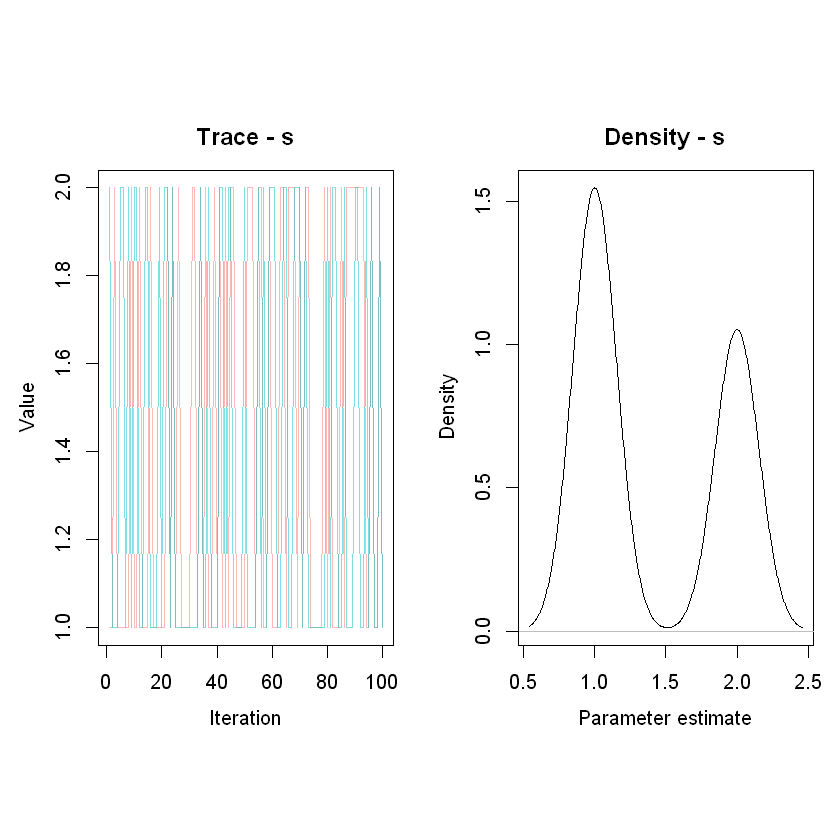

In [8]:
# Example of sampling from the Categorical distribution
model_string = "
model {
    s ~ dcat(alpha)
}
"


model = jags.model(textConnection(model_string),
                   n.chains = 2,
                   data = list(alpha=alpha))

samp = coda.samples(model, 
                    variable.names=c("s"), 
                    n.iter=100, progress.bar="none")

# Show a summary of the variables
MCMCsummary(samp, round = 2)

# Show plots
MCMCtrace(samp, pdf=FALSE)

In [9]:
# Samples from the categorical distribution
as.matrix(samp)[,"s"]

[1] 1 1 2 1 1 1 1 1 2 1 1 2 1 1 1 2 1 1 1 1 1 2 1 2 1 2 1 1 1 1 2 2 1 2 1 2 1
 [38] 1 2 1 2 1 2 1 2 2 1 1 1 1 2 2 2 1 2 2 1 1 2 1 1 1 2 2 1 2 2 2 1 2 1 2 2 1
 [75] 1 1 1 1 2 1 2 1 1 1 2 1 2 2 2 2 2 2 2 1 1 2 1 1 2 1 2 1 1 1 2 2 1 2 1 2 2
[112] 1 1 2 2 1 1 1 2 1 2 2 1 2 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 2 2 1 2 2 1 1 1
[149] 1 2 1 1 1 1 2 1 2 1 2 2 2 1 1 2 2 1 1 2 2 2 1 2 1 1 1 1 1 1 1 2 1 2 2 1 1
[186] 2 1 1 1 2 2 1 1 2 1 2 1 1 2 1

## Infer parameters of a categorical distribution

In this section, the parameters of a categorical distribution as inferred using JAGS.

In [11]:
# Probability of each of the classes
prob = c(0.4, 0.1, 0.5)

In [14]:
# Number of samples to generate
N = 20

# Generate one-hot encoded samples
x = rmultinom(N, 1, prob)

y = rep(0, N)
for (i in 1:N) {
    y[i] = which(x[,i] == 1)
}
y

[1] 3 3 1 1 3 1 3 3 3 1 1 3 3 3 2 1 3 3 1 2

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 20
   Unobserved stochastic nodes: 1
   Total graph size: 26

Initializing model



,mean,sd,2.5%,50%,97.5%,Rhat,n.eff
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
alpha[1],0.35,0.10,0.16,0.36,0.54,0.99,200
alpha[2],0.14,0.07,0.03,0.13,0.30,1.02,292
alpha[3],0.51,0.10,0.34,0.51,0.70,1.01,303


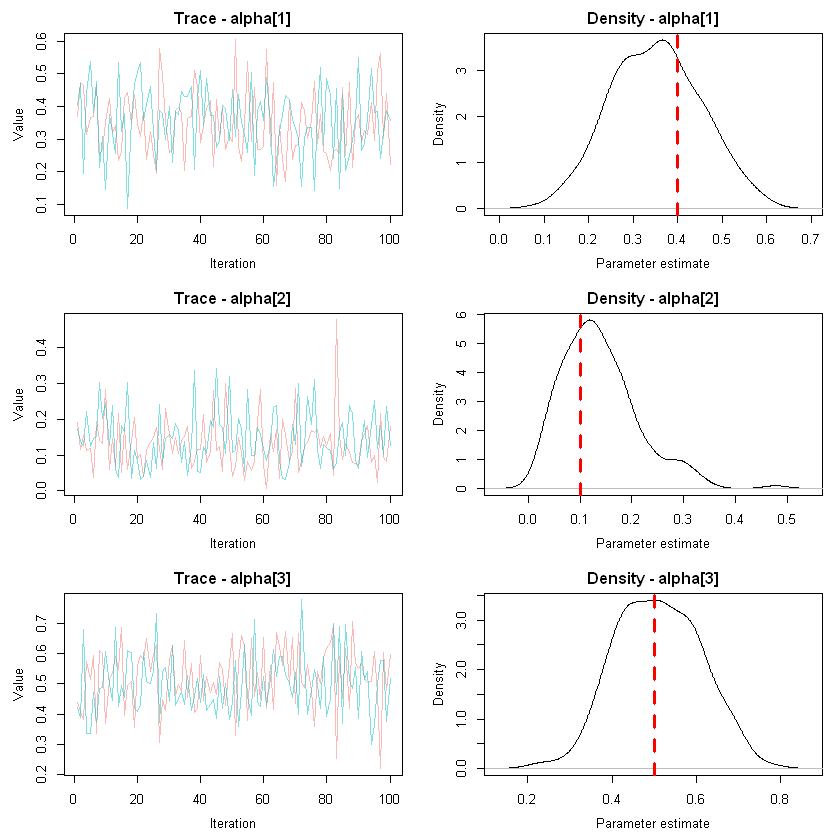

In [19]:
# Infer the parameters of the categorical distribution
model_string = "
model {
    alpha ~ ddirch(theta)

    for (i in 1:N) {
        y[i] ~ dcat(alpha)
    }
}
"

model = jags.model(textConnection(model_string),
                   n.chains = 2,
                   data = list(theta=c(1, 1, 1), N=N, y=y))

samp = coda.samples(model, 
                    variable.names=c("alpha"), 
                    n.iter=100, 
                    progress.bar="none")

# Show a summary of the variables
MCMCsummary(samp, round = 2)

# Show plots
MCMCtrace(samp, 
          gv=prob,
          pdf=FALSE)

The value of $\alpha$ used to generate the data are shown with dashed red lines in the figure above.